# Data Visualizations in Python: Nintendo Dataset

---

## Pre-visualizations Checklists 

In [4]:
# I am importing two libraries which are Pandas and NumPy
import pandas as pd
import numpy as np

In [5]:
# Set my DataFrame name to nintendo
nintendo = pd.read_csv("nintendo_dataset.csv")
nintendo.head()

,Game,Developer,Publisher,Release Date,Sales,Platform,Genre
0,Super Mario World,Nintendo EAD,Nintendo,11/21/1990,20610000,Nintendo Entertainment System (NES),Platformer
1,F-Zero,Nintendo EAD,Nintendo,11/21/1990,2850000,Nintendo Entertainment System (NES),Racing
2,Pilotwings,Nintendo EAD,Nintendo,12/21/1990,2000000,Nintendo Entertainment System (NES),Flight simulation
3,Final Fight,Capcom,Capcom,12/21/1990,1480000,Nintendo Entertainment System (NES),Beat 'em up
4,SimCity,Nintendo EAD,Nintendo,4/26/1991,1980000,Nintendo Entertainment System (NES),Simulation


In [6]:
# info of dataset to check for data type
nintendo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Game          430 non-null    object
 1   Developer     430 non-null    object
 2   Publisher     430 non-null    object
 3   Release Date  430 non-null    object
 4   Sales         430 non-null    int64 
 5   Platform      430 non-null    object
 6   Genre         430 non-null    object
dtypes: int64(1), object(6)
memory usage: 23.6+ KB


Everything looks good, except **Release Date** column because it needs to be in date data type; therefore, lets change that.

In [8]:
nintendo["Release Date"] = pd.to_datetime(nintendo["Release Date"])

In [9]:
nintendo.info() # Check to see if Release Date is in datetime64[ns] as data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Game          430 non-null    object        
 1   Developer     430 non-null    object        
 2   Publisher     430 non-null    object        
 3   Release Date  430 non-null    datetime64[ns]
 4   Sales         430 non-null    int64         
 5   Platform      430 non-null    object        
 6   Genre         430 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 23.6+ KB


---

## Data Visualizations

#### Line plots: sales over time 

In [13]:
# Resample "Sales" by year and sum the values
yearly_sales = nintendo.resample("Y", on="Release Date")["Sales"].sum()

In [14]:
# Extract year and sales data for plotting
years = yearly_sales.index.to_numpy()
sales = yearly_sales.to_numpy()

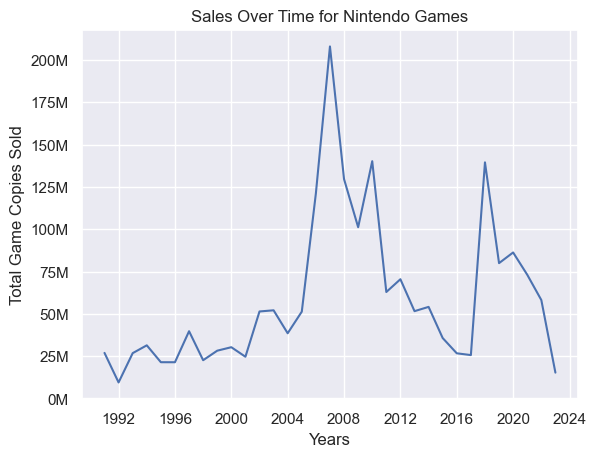

In [15]:
# Import matplotlib library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Create a line plot
plt.plot(years, sales)
plt.title("Sales Over Time for Nintendo Games")
plt.xlabel("Years")
plt.ylabel("Total Game Copies Sold")
plt.yticks(ticks=[0, 25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000, 200000000],
           labels=["0M", "25M", "50M", "75M", "100M", "125M", "150M", "175M", "200M"])
plt.show()

### Bar charts: Visualize the top-selling games, developers, and publishers.

#### Bar Chart: Top 10 selling games

In [18]:
# Sort the DataFrame by "Sales" column in descending order
top_selling_games = nintendo.sort_values(by="Sales", ascending=False)

In [19]:
# Select the top 10 games
top_games = top_selling_games.head(10)
top_games

,Game,Developer,Publisher,Release Date,Sales,Platform,Genre
198,Wii Sports,Nintendo EAD (Group 2),Nintendo,2006-11-19,82900000,Wii,Sports
365,Mario Kart 8 Deluxe,Nintendo EPD,Nintendo,2017-04-28,45330000,Nintendo Switch,Kart racing
403,Animal Crossing: New Horizons,Nintendo EPD,Nintendo,2020-03-20,38640000,Nintendo Switch,Social simulation
245,Mario Kart Wii,Nintendo EAD (Group 1),Nintendo,2008-04-10,37380000,Wii,Racing
271,Wii Sports Resort,Nintendo EAD (Group 2),Nintendo,2009-06-25,33140000,Wii,Sports
188,New Super Mario Bros.,Nintendo EAD (Group 4),Nintendo,2006-05-15,30800000,Nintendo DS,Platformer
280,New Super Mario Bros. Wii,Nintendo EAD (Group 4),Nintendo,2009-11-12,30320000,Wii,Platformer
388,Super Smash Bros. Ultimate,"Bandai Namco Studios, Sora Ltd.",Nintendo,2018-12-07,28170000,Nintendo Switch,Fighting
203,Wii Play,Nintendo EAD (Group 2),Nintendo,2006-12-02,28020000,Wii,Party
362,The Legend of Zelda: Breath of the Wild,Nintendo EPD,Nintendo,2017-03-03,26550000,Nintendo Switch,Action-adventure


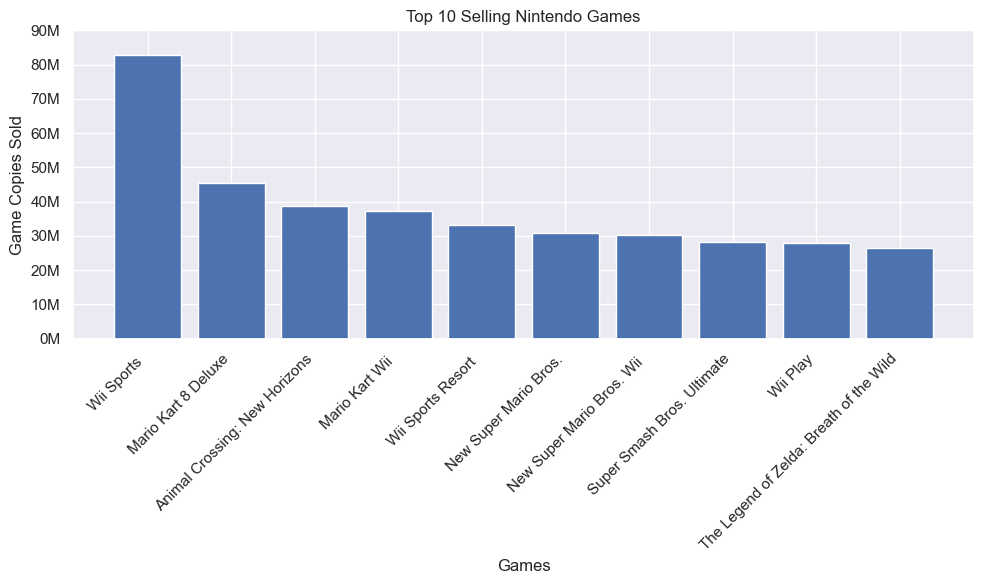

In [20]:
# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(x=top_games["Game"], height=top_games["Sales"])

# Set title, labels, and ticks
plt.title("Top 10 Selling Nintendo Games")
plt.xlabel("Games")
plt.ylabel("Game Copies Sold")
plt.xticks(rotation=45, ha="right")
plt.yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000],
           labels=["0M", "10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M", "90M"])

# Show the plot
plt.tight_layout() 
plt.show()

#### Bar Chart: Top 10 developers

In [22]:
# Create group by developer to sum up total of sales with .sum() function
top_developers = nintendo.groupby(by="Developer")["Sales"].sum()

# Sort by values in descending order, limit to 10
top_developers = top_developers.sort_values(ascending=False).head(10)

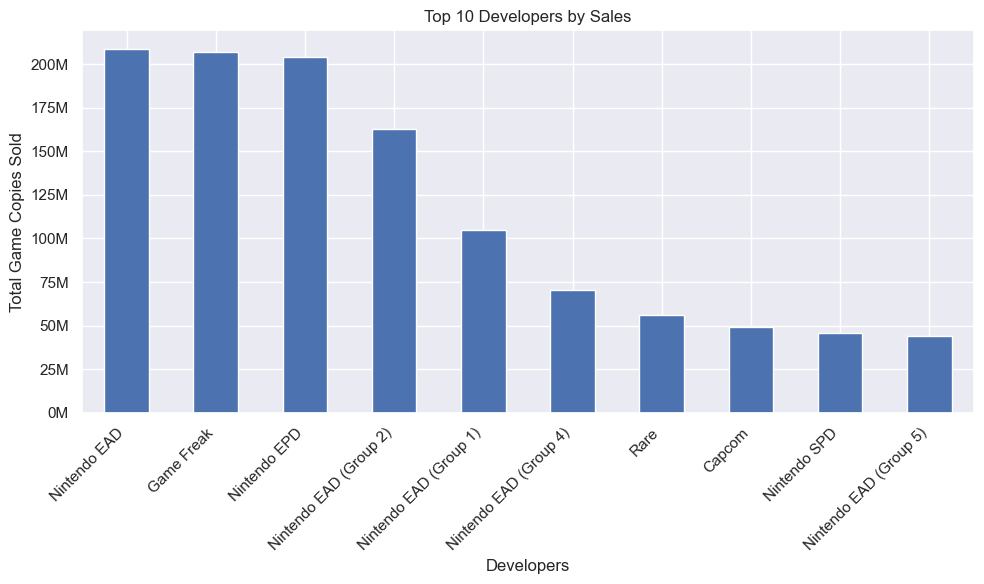

In [23]:
# Create a bar chart
plt.figure(figsize=(10, 6))
top_developers.plot(kind="bar")

# Create title, labels, and ticks
plt.title("Top 10 Developers by Sales")
plt.xlabel("Developers")
plt.ylabel("Total Game Copies Sold")
plt.xticks(rotation=45, ha="right")
plt.yticks([0, 25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000, 200000000],
           labels=["0M", "25M", "50M", "75M", "100M", "125M", "150M", "175M", "200M"])

# Show the plot
plt.tight_layout()
plt.show()

#### Bar Chart: Top 10 Publishers

In [25]:
# Create group by publisher to sum up total of sales with .sum() function
top_publishers = nintendo.groupby(by="Publisher")["Sales"].sum()

# Sort by values, limit to 10
top_publishers = top_publishers.sort_values(ascending=False).head(10)

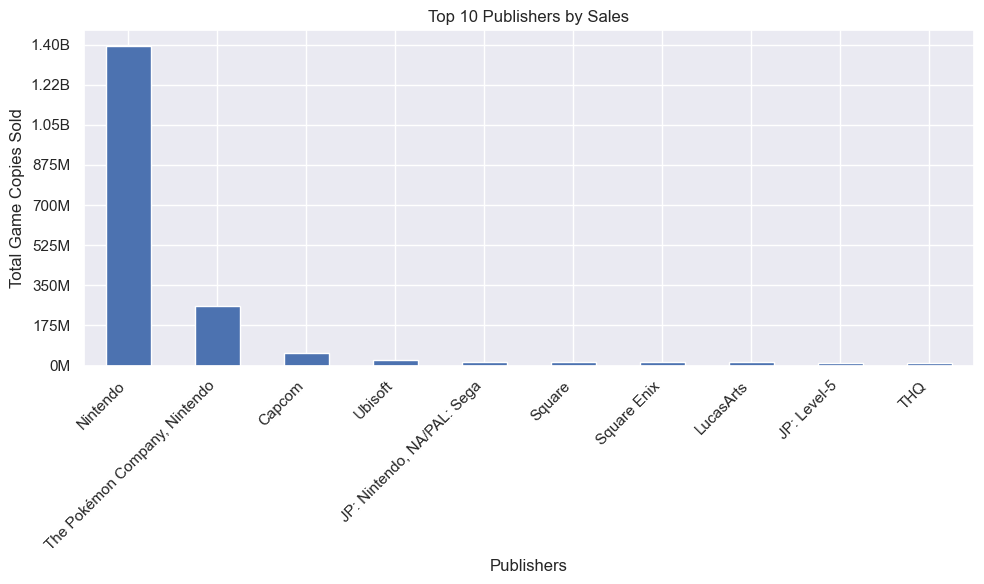

In [26]:
# Create a bar chart
plt.figure(figsize=(10, 6))
top_publishers.plot(kind="bar")

# Create title, labels, and ticks
plt.title("Top 10 Publishers by Sales")
plt.xlabel("Publishers")
plt.ylabel("Total Game Copies Sold")
plt.xticks(rotation=45, ha="right")
plt.yticks(ticks=[0, 175000000, 350000000, 525000000, 700000000, 875000000, 1050000000, 1225000000, 1400000000],
           labels=["0M", "175M", "350M", "525M", "700M", "875M", "1.05B", "1.22B", "1.40B"])

# Show a plot
plt.tight_layout()
plt.show()

---

### Histogram: Analyze the distribution of sales and release dates

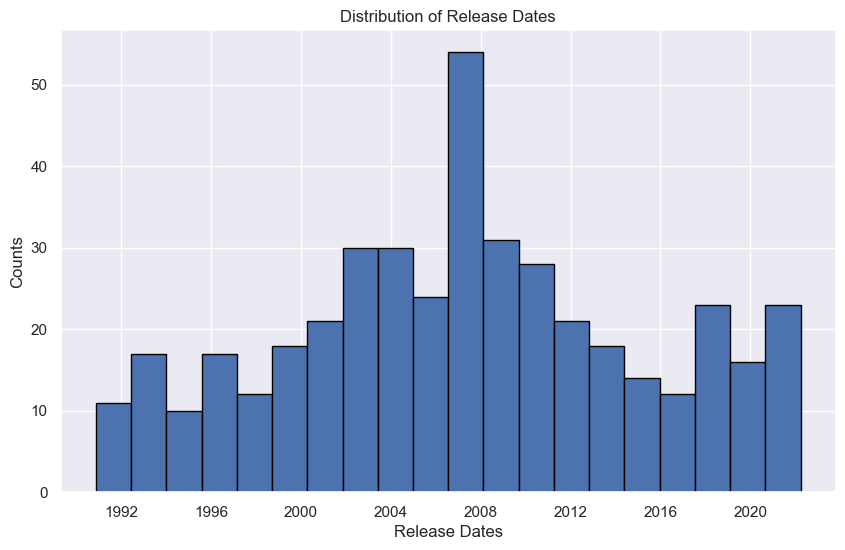

In [29]:
# Create a histogram chart
plt.figure(figsize=(10, 6))
plt.hist(x=nintendo["Release Date"], bins=20, edgecolor="black")

# Create title, labels, and ticks
plt.title("Distribution of Release Dates")
plt.xlabel("Release Dates")
plt.ylabel("Counts")

# Show the plot
plt.tight_layout
plt.show()

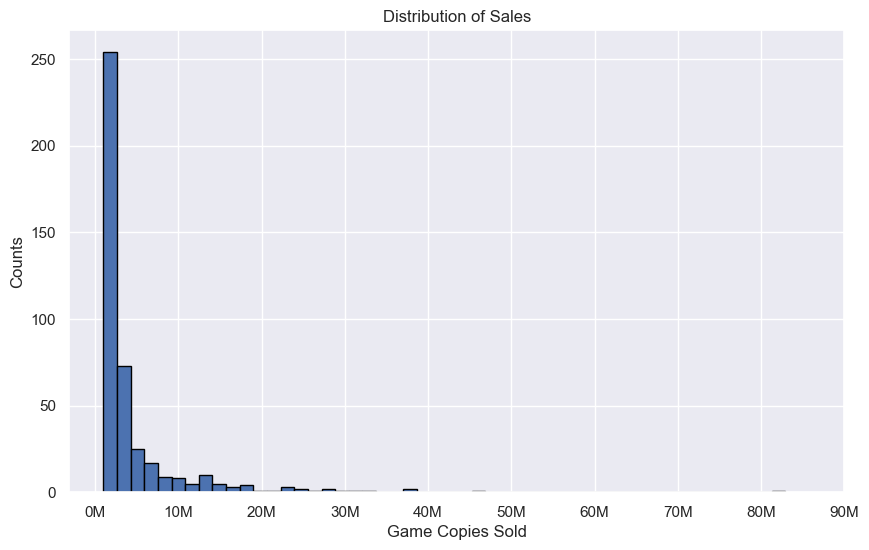

In [30]:
# Create a histogram chart
plt.figure(figsize=(10, 6))
plt.hist(x=nintendo["Sales"], bins=50, edgecolor="black")

# Create title, labels, and ticks
plt.title("Distribution of Sales")
plt.xlabel("Game Copies Sold")
plt.ylabel("Counts")
plt.xticks(ticks=[0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000],
           labels=["0M", "10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M", "90M"])

# Show the plot
plt.tight_layout
plt.show()

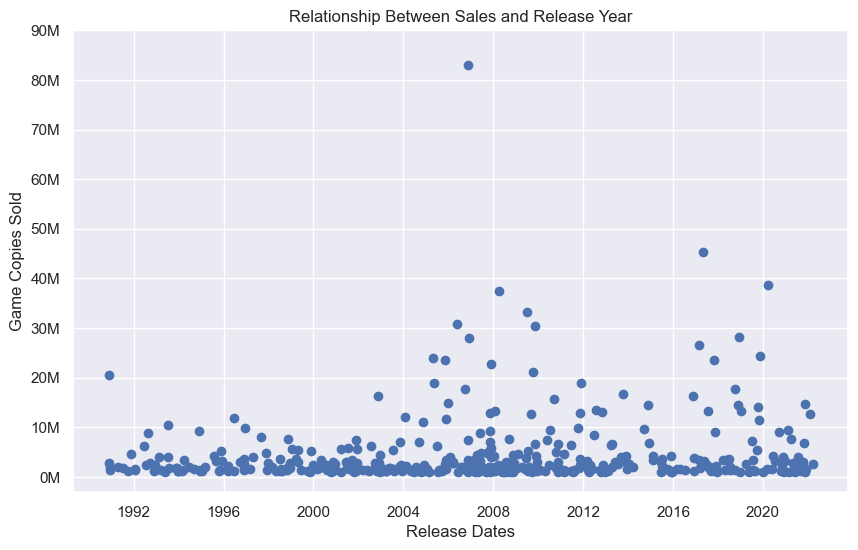

In [31]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x=nintendo["Release Date"], y=nintendo["Sales"])

# Create title, labels, and ticks
plt.title("Relationship Between Sales and Release Year")
plt.xlabel("Release Dates")
plt.ylabel("Game Copies Sold")
plt.yticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000, 90000000],
           labels=["0M", "10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M", "90M"])

# Display a plot
plt.tight_layout
plt.show()

---

## Genre Analysis:

In [34]:
# Limit top 10 Genre
top_genres = nintendo.groupby(by="Genre")["Sales"].sum()
top_genres = top_genres.sort_values(ascending=False).head(10)
top_genres

Genre
Platformer             315261541
Role-playing           303580000
Sports                 177630000
Action-adventure       150506000
Racing                 137030000
Party                  116430000
Fighting                96070000
Puzzle                  72710000
Action role-playing     54860000
Social simulation       53100000
Name: Sales, dtype: int64

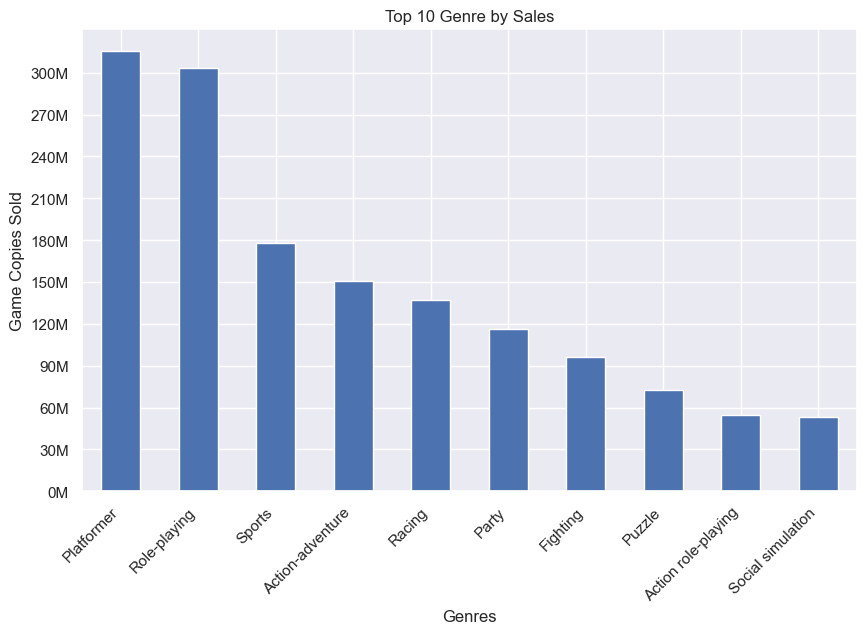

In [35]:
# Create a bar chart for Genre analysis
plt.figure(figsize=(10, 6))
top_genres.plot(kind="bar")

# Create title, labels, and ticks
plt.title("Top 10 Genre by Sales")
plt.xlabel("Genres")
plt.ylabel("Game Copies Sold")
plt.xticks(ha="right", rotation=45)
plt.yticks([0, 30000000, 60000000, 90000000, 120000000, 150000000, 180000000, 210000000, 240000000, 270000000, 300000000],
           labels=["0M", "30M", "60M", "90M", "120M", "150M", "180M", "210M", "240M", "270M", "300M"])

# Display a plot
plt.tight_layout
plt.show()

#### I want to analyze sales trends for top 3 genres over time

In [37]:
# Create top 3 Genres
top_3_genres = nintendo.groupby("Genre")["Sales"].sum().sort_values(ascending=False).head(3)

# Filter for top 3 genres by sales and convert into list
top_3_genres = top_3_genres.index.to_list()

In [38]:
top_3_genres # Just checking to see if the top 3 list works as in list

['Platformer', 'Role-playing', 'Sports']

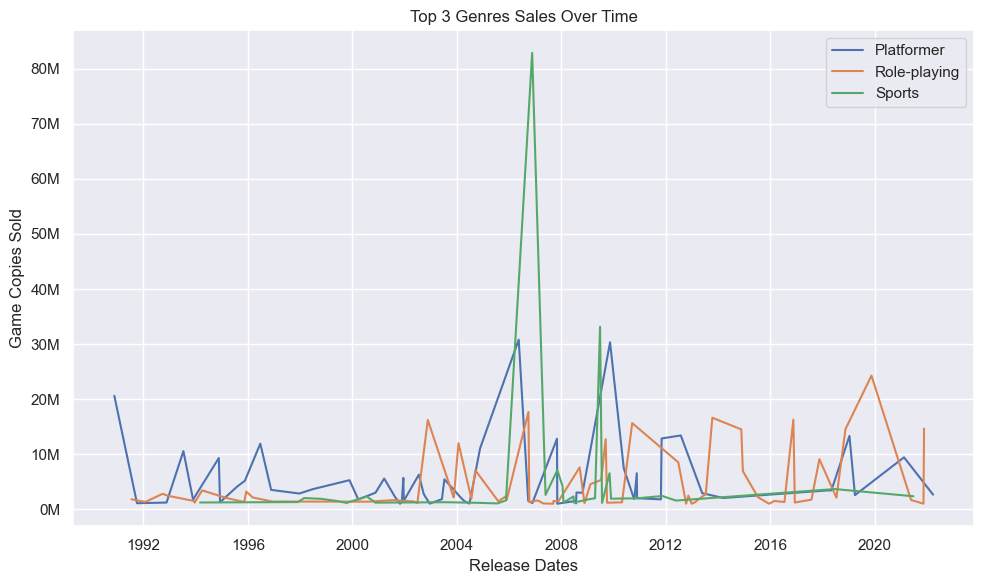

In [68]:
# Filter nintendo dataset for top 3 genres
nintendo_filtered = nintendo[nintendo["Genre"].isin(top_3_genres)]

# Initialize the plt
plt.figure(figsize=(10,6))

# Using for loop to plot time series for each genre
for genre in top_3_genres:
    plt.plot(nintendo_filtered[nintendo_filtered["Genre"] == genre]["Release Date"],
             nintendo_filtered[nintendo_filtered["Genre"] == genre]["Sales"],
             label=genre)

# Adding labels, title, and ticks
plt.xlabel('Release Dates')
plt.yticks(ticks=[0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000, 70000000, 80000000],
           labels=["0M", "10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M"])
plt.ylabel('Game Copies Sold')
plt.title('Top 3 Genres Sales Over Time')
plt.legend()
plt.tight_layout()
plt.show()

---

## Platform analysis:

In [74]:
top_platforms = nintendo.groupby(by="Platform")["Sales"].sum().sort_values(ascending=False)
top_platforms

Platform
Wii                                    444850000
Nintendo Switch                        439690000
Nintendo DS                            351010000
Nintendo 3DS                           244990000
Nintendo Entertainment System (NES)    147080000
Nintendo 64                            135994765
Game Boy Advanced                      116341075
GameCube                                76100000
Name: Sales, dtype: int64

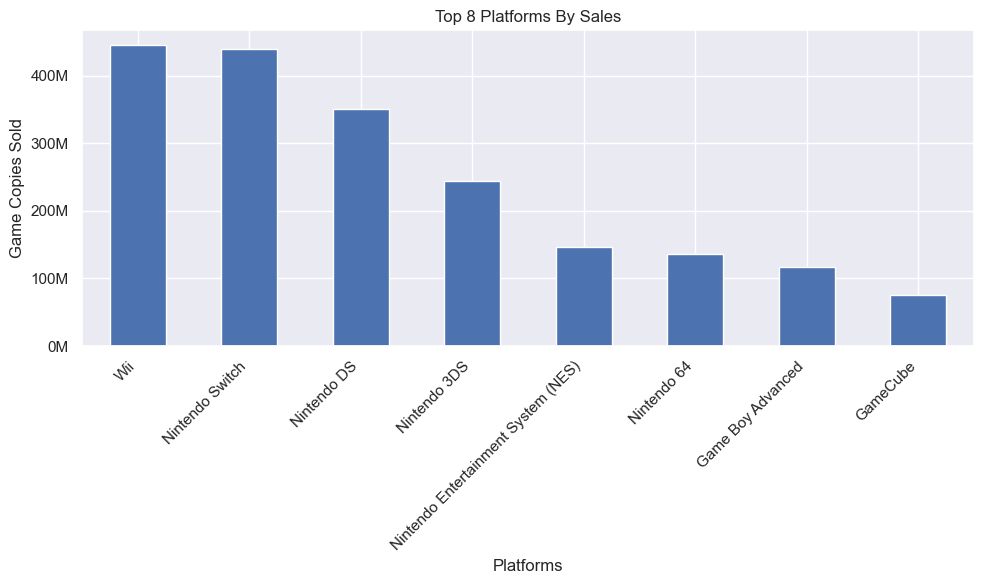

In [78]:
# Create a bar plot for platform analysis
plt.figure(figsize=(10, 6))
top_platforms.plot(kind="bar")

# Create title, labels, and ticks
plt.title("Top 8 Platforms By Sales")
plt.xlabel("Platforms")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Game Copies Sold")
plt.yticks([0, 100000000, 200000000, 300000000, 400000000],
           labels=["0M", "100M", "200M", "300M", "400M"])

# Display a plot
plt.tight_layout()
plt.show()

### This is the end of Analysis